In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import pickle 
import random
from dtaidistance import dtw

In [2]:
# pd.set_option('max_r', 25)
# pd.options.display.max_columns

In [3]:
df = pd.read_csv("./data/Toy_data.csv")
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df['Date'] = df.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d') )
df = df.set_index(['Date'])


In [4]:
df.shape

(8184, 21)

In [5]:
df.isna().sum()

VIX Index            1
MOVE Index           0
MXWD Index           0
SBWGU Index          0
SPGSCI Index         0
.TED G Index         0
KOSPI2 Index         2
SPX Index            0
SX5E Index           0
NKY Index            0
UKX Index            0
HSI Index            0
MXWO000V Index       0
MXWOMOM Index        0
MXUS000V Index       0
MXUSMMT Index     1151
MXUSQU Index         0
MXUSMVOL Index       0
DXY Curncy           0
GOLDLNPM Index       0
USYC2Y10 Index       0
dtype: int64

In [6]:
df_tar = pd.read_csv("./data/Toy_data_target.csv")
df_tar['Date'] = df_tar.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d') )
df_tar = df_tar.set_index(['Date'])

In [7]:
df

,VIX Index,MOVE Index,MXWD Index,SBWGU Index,SPGSCI Index,.TED G Index,KOSPI2 Index,SPX Index,SX5E Index,NKY Index,...,HSI Index,MXWO000V Index,MXWOMOM Index,MXUS000V Index,MXUSMMT Index,MXUSQU Index,MXUSMVOL Index,DXY Curncy,GOLDLNPM Index,USYC2Y10 Index
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,87.93,139.57,201.8721,207.2500,60.455929,NaN,353.40,1098.49,38915.87,...,2836.57,854.5,197.02,479.77,NaN,156.39,338.94,93.160,398.60,9.450
1990-01-02,17.24,91.73,140.01,201.8721,212.0900,57.420952,NaN,359.69,1101.34,38915.87,...,2838.07,854.5,197.02,479.77,NaN,156.39,338.94,94.250,399.00,5.450
1990-01-03,18.19,93.21,140.08,201.8721,215.6400,52.122430,100.00,358.76,1112.82,38915.87,...,2858.72,854.5,197.02,479.77,NaN,156.39,338.94,94.450,395.00,4.650
1990-01-04,19.22,95.09,140.59,201.8721,212.1400,49.158506,102.00,355.67,1113.02,38712.88,...,2867.95,854.5,197.02,479.77,NaN,156.39,338.94,92.540,396.50,6.150
1990-01-05,20.11,85.28,139.45,201.8721,206.9200,60.283372,100.38,352.20,1099.52,38274.76,...,2839.94,854.5,197.02,479.77,NaN,156.39,338.94,93.060,405.00,9.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,16.69,54.13,710.36,1055.4940,523.0299,15.481000,428.56,4232.60,4034.25,29357.82,...,28610.65,3296.6,3212.25,3304.84,3672.89,3537.97,3425.33,90.233,1836.55,142.826
2021-05-10,19.66,55.48,706.50,1055.8360,520.8378,17.003500,435.63,4188.43,4023.35,29518.34,...,28595.66,3306.6,3144.34,3304.10,3576.80,3496.94,3429.26,90.212,1840.45,144.524
2021-05-11,21.84,58.01,698.42,1053.4370,524.4095,15.518000,428.77,4152.10,3946.06,28608.59,...,28013.81,3258.8,3128.57,3261.40,3584.62,3476.37,3398.58,90.141,1829.10,146.092


In [8]:
df_tar.head()

,TLT,EMB,AGG,Cash,SPY,EFA,VWO,GLD,DBC
Date,,,,,,,,,
1980-01-01,NaN,NaN,1000.0,NaN,1000.000000,1000.0,NaN,1000.000000,NaN
1980-01-02,NaN,NaN,1000.0,NaN,979.803595,1000.0,NaN,1092.773438,NaN
1980-01-03,NaN,NaN,1000.0,NaN,974.800815,1000.0,NaN,1238.281250,NaN
1980-01-04,NaN,NaN,1000.0,NaN,986.844543,1000.0,NaN,1148.437500,NaN
1980-01-07,NaN,NaN,1000.0,NaN,989.531221,1000.0,NaN,1237.304688,NaN


In [9]:
# X input 의 시작점과 동일하게 
df_tar = df_tar.loc["1990-01-01":]

In [10]:
df_tar.to_csv("./data/df_tar.csv")

In [11]:
df_tar.shape

(8184, 9)

In [12]:
df_tar.isna().sum()

TLT       0
EMB     804
AGG       0
Cash      0
SPY       0
EFA       0
VWO       0
GLD       0
DBC       0
dtype: int64

In [13]:
df.shape

(8184, 21)

In [14]:
df['MXUSMMT Index'].dropna(axis = 0)

Date
1994-05-31     161.32
1994-06-01     161.78
1994-06-02     161.31
1994-06-03     161.34
1994-06-06     161.29
               ...   
2021-05-07    3672.89
2021-05-10    3576.80
2021-05-11    3584.62
2021-05-12    3473.44
2021-05-13    3483.57
Name: MXUSMMT Index, Length: 7033, dtype: float64

<AxesSubplot:>

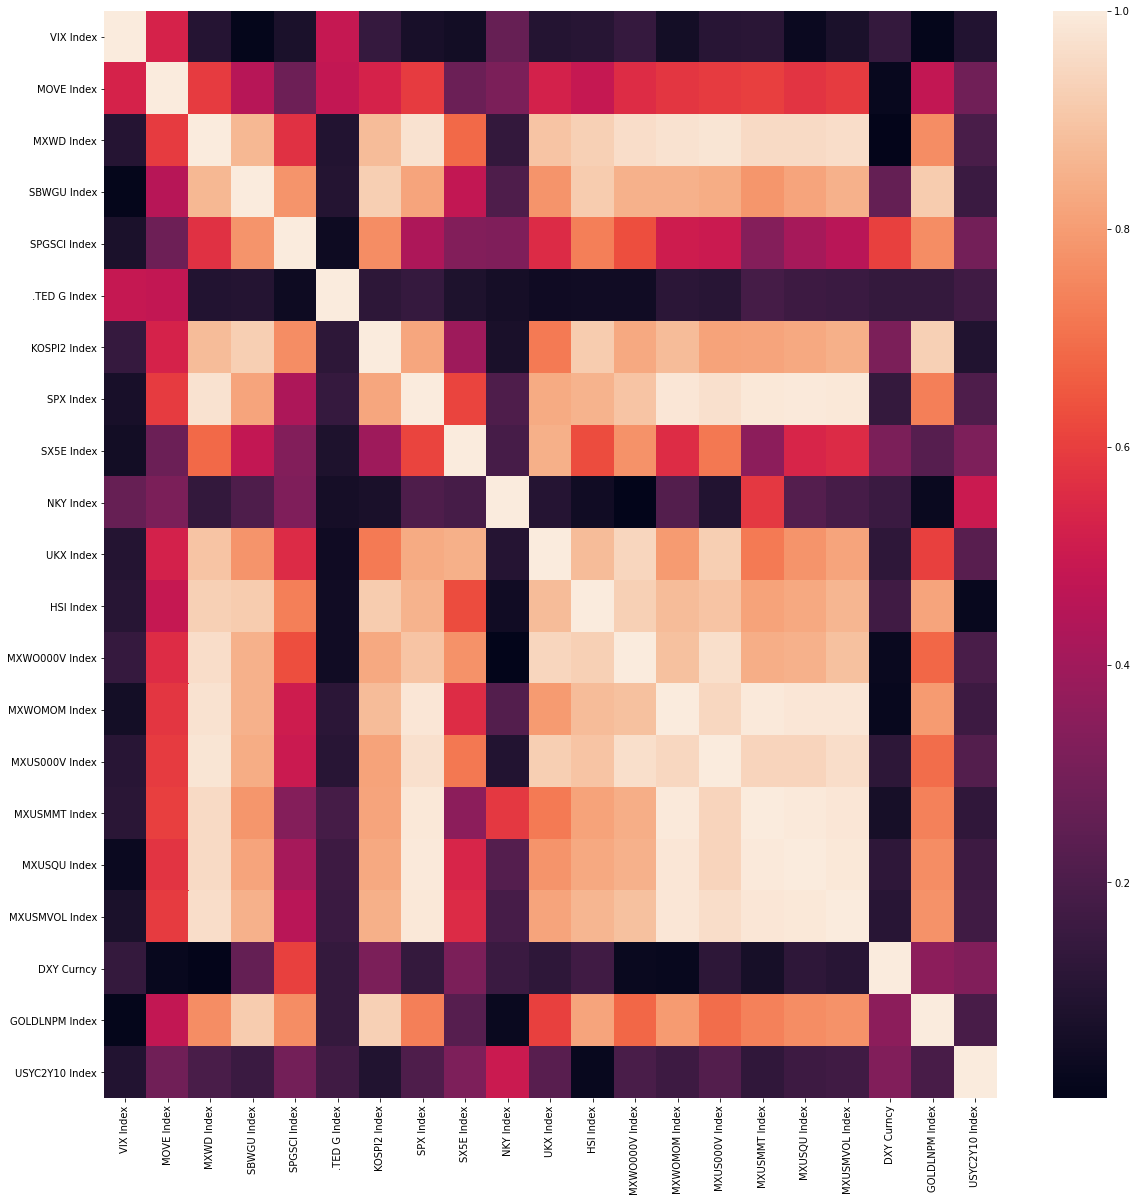

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(abs(df.corr()))

In [16]:
df.isna().sum()

VIX Index            1
MOVE Index           0
MXWD Index           0
SBWGU Index          0
SPGSCI Index         0
.TED G Index         0
KOSPI2 Index         2
SPX Index            0
SX5E Index           0
NKY Index            0
UKX Index            0
HSI Index            0
MXWO000V Index       0
MXWOMOM Index        0
MXUS000V Index       0
MXUSMMT Index     1151
MXUSQU Index         0
MXUSMVOL Index       0
DXY Curncy           0
GOLDLNPM Index       0
USYC2Y10 Index       0
dtype: int64

In [17]:
print ('Input Nan ratio')
print (round((df.isna().sum()/df.shape[0])*100, 2))

Input Nan ratio
VIX Index          0.01
MOVE Index         0.00
MXWD Index         0.00
SBWGU Index        0.00
SPGSCI Index       0.00
.TED G Index       0.00
KOSPI2 Index       0.02
SPX Index          0.00
SX5E Index         0.00
NKY Index          0.00
UKX Index          0.00
HSI Index          0.00
MXWO000V Index     0.00
MXWOMOM Index      0.00
MXUS000V Index     0.00
MXUSMMT Index     14.06
MXUSQU Index       0.00
MXUSMVOL Index     0.00
DXY Curncy         0.00
GOLDLNPM Index     0.00
USYC2Y10 Index     0.00
dtype: float64


In [18]:
df.to_csv("./data/df.csv")

In [19]:
df = df.drop('MXUSMMT Index', axis = 1)

In [20]:
# Input Nan 
print ("Input nan num: ")
round((df.isna().sum()))
# MXUSMMT Index : 선진국 모멘텀 지수 -> MSCI + Momentum

Input nan num: 


VIX Index         1
MOVE Index        0
MXWD Index        0
SBWGU Index       0
SPGSCI Index      0
.TED G Index      0
KOSPI2 Index      2
SPX Index         0
SX5E Index        0
NKY Index         0
UKX Index         0
HSI Index         0
MXWO000V Index    0
MXWOMOM Index     0
MXUS000V Index    0
MXUSQU Index      0
MXUSMVOL Index    0
DXY Curncy        0
GOLDLNPM Index    0
USYC2Y10 Index    0
dtype: int64

In [21]:
# 나머지 채워넣기 
df = df.fillna(method = 'bfill')

In [22]:
df.isna().sum()

VIX Index         0
MOVE Index        0
MXWD Index        0
SBWGU Index       0
SPGSCI Index      0
.TED G Index      0
KOSPI2 Index      0
SPX Index         0
SX5E Index        0
NKY Index         0
UKX Index         0
HSI Index         0
MXWO000V Index    0
MXWOMOM Index     0
MXUS000V Index    0
MXUSQU Index      0
MXUSMVOL Index    0
DXY Curncy        0
GOLDLNPM Index    0
USYC2Y10 Index    0
dtype: int64

In [23]:
print ('Input Nan ratio')
print (round((df.isna().sum()/df.shape[0])*100, 2))

Input Nan ratio
VIX Index         0.0
MOVE Index        0.0
MXWD Index        0.0
SBWGU Index       0.0
SPGSCI Index      0.0
.TED G Index      0.0
KOSPI2 Index      0.0
SPX Index         0.0
SX5E Index        0.0
NKY Index         0.0
UKX Index         0.0
HSI Index         0.0
MXWO000V Index    0.0
MXWOMOM Index     0.0
MXUS000V Index    0.0
MXUSQU Index      0.0
MXUSMVOL Index    0.0
DXY Curncy        0.0
GOLDLNPM Index    0.0
USYC2Y10 Index    0.0
dtype: float64


In [24]:
print('target Nan')
round((df_tar.isna().sum()))

target Nan


TLT       0
EMB     804
AGG       0
Cash      0
SPY       0
EFA       0
VWO       0
GLD       0
DBC       0
dtype: int64

In [25]:
print ('target Nan ratio')
round((df_tar.isna().sum()/10793 )*100, 2)

# SPY 기준으로 가격을 생성 
# 상장이 늦게 될 수도 

target Nan ratio


TLT     0.00
EMB     7.45
AGG     0.00
Cash    0.00
SPY     0.00
EFA     0.00
VWO     0.00
GLD     0.00
DBC     0.00
dtype: float64

# df_tar Nan 처리 
- Nan 을 빼버리면 데이터가 많이 남지 않게 되어 최대한 데이터를 확보하는 식으로 진행  
우선, df_tar 은 과거 10년치 데이터가 더 있는 상태 
1. 실제 해당 데이터를 가져온다.
2. 유추해본다. (평균, smoothing, 등등)

In [26]:
print ("input  starting :", df.index.min())
print ("target starting :", df_tar.index.min())

input  starting : 1990-01-01 00:00:00
target starting : 1990-01-01 00:00:00


In [27]:
from collections import Counter

df_tar_non = [x for x in df_tar.index if x not in df.index]
# target 에만 있는 date 
Counter([x.weekday() for x in df_tar.index if x not in df.index]) # 0 : mon ~ 4: fri

Counter()

In [28]:
print ("Number of non-intersected Date: ",len([x for x in df_tar.index if x not in df.index]))

Number of non-intersected Date:  0


In [29]:
df.shape

(8184, 20)

In [30]:
df_tar.shape

(8184, 9)

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose


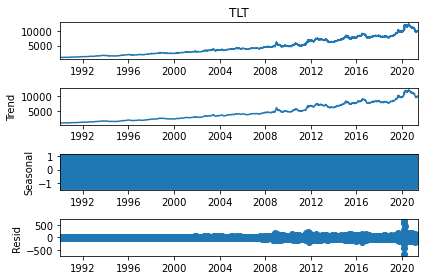

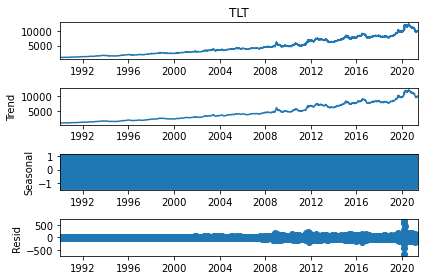

In [32]:
re = seasonal_decompose(df_tar.iloc[:,0].dropna(axis = 0), model = 'additive')
re.plot()

<AxesSubplot:xlabel='Date'>

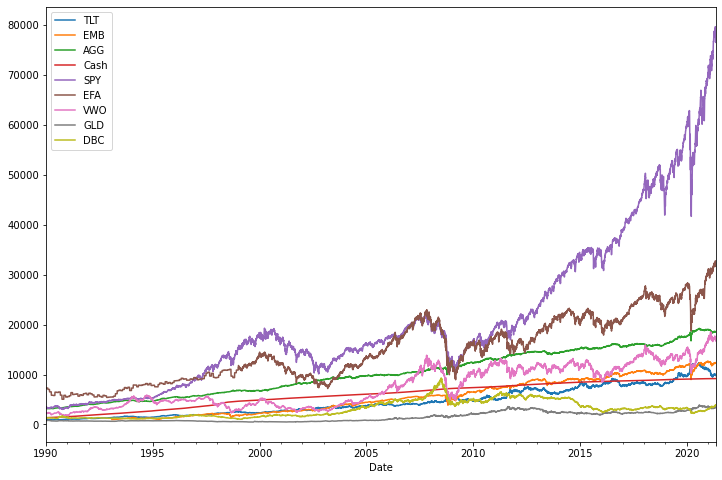

In [33]:
# plt.figure()
df_tar.plot(figsize = (12,8))


<AxesSubplot:xlabel='Date'>

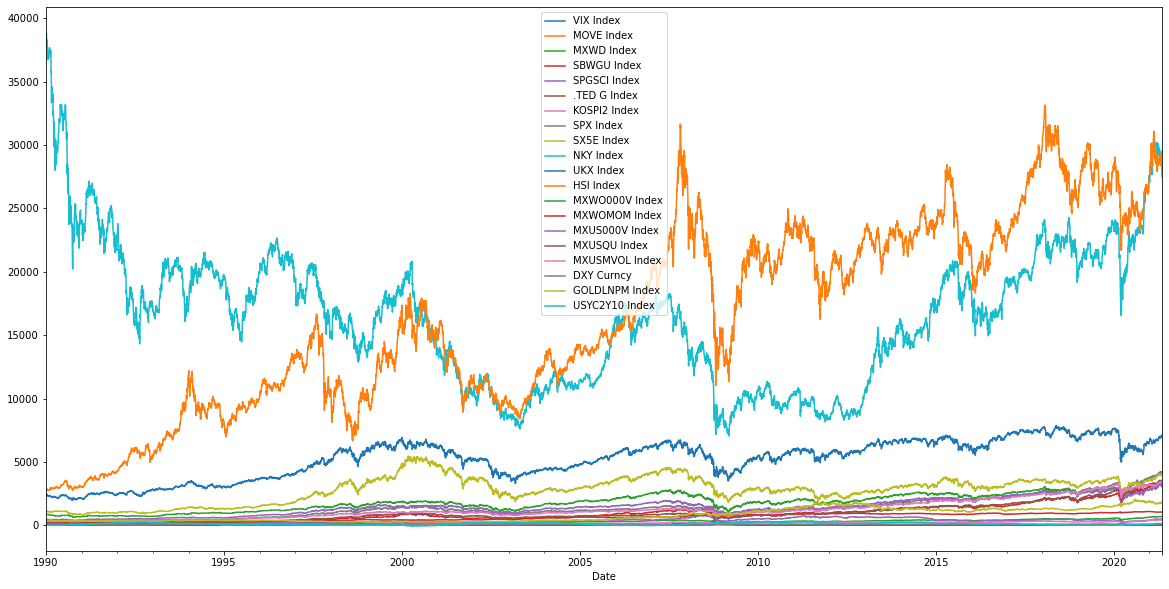

In [34]:
df.plot(figsize = (20,10))

In [35]:
dtw.distance_fast(df.iloc[:,0].to_numpy(), df.iloc[:,5].to_numpy())

2178.5098719199996

In [36]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# X similarity analysis (Correlation)

In [37]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from sklearn.preprocessing import StandardScaler # 정규화 해주고 similarity 를 비교 

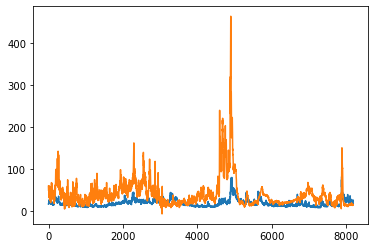

In [38]:
plt.plot(df.iloc[:,0].to_numpy())
plt.plot(df.iloc[:,5].to_numpy())

In [39]:
dtw.distance_fast(df.iloc[:,0].to_numpy(), df.iloc[:,-1].to_numpy())

7847.68829647808

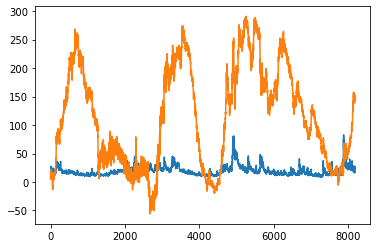

In [40]:
plt.plot(df.iloc[:,0].to_numpy())
plt.plot(df.iloc[:,-1].to_numpy())

## Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [42]:
x_col = df.columns
df_ts_index = df.index

In [43]:
z_scaler = StandardScaler()
z_scaler.fit(df)
df_z = z_scaler.transform(df)
df_z = pd.DataFrame(df_z, columns = x_col, index = df_ts_index)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df)
df_mm = min_max_scaler.transform(df)
df_mm = pd.DataFrame(df_mm, columns = x_col, index = df_ts_index)




In [44]:
import time
from tqdm import tqdm
import seaborn as sns

In [45]:
def dtw_sim_matrix(df_z):
    '''
    input : z_normalized df(concated ver)
    return : similarity value (array form) & heatmap 
    '''
    col_name = list(df_z.columns)
    num_col = len(col_name)

    dtw_pair = {}
    before_col = []

    # df_z : scaled df
    for col1 in tqdm(col_name):
        ind1 = col_name.index(col1)
        s1 = df_z[col1].to_numpy()
        before_col.append(col1)
        # only consider non-calcuated pairs
        col_name2 =  [item for item in col_name if item not in before_col] +([col1]) # 자기자신도 포함 

        for col2 in (col_name2):
            ind2 = col_name.index(col2)
            s2 = df_z[col2].to_numpy()
            # dtw calculation 
            sim = dtw.distance_fast(s1, s2)
            sim = round(sim, 2)
            dtw_pair[(ind1, ind2)] = sim

    sim_arr = np.zeros((num_col,num_col))
    
    for i in range(num_col):
        for j in range(i, num_col):
            key = (i,j)
            sim_value = dtw_pair[key]
            sim_arr[i][j] = sim_value
    # symmetric matrix generation 
    sim_arr_all = sim_arr + sim_arr.T 
    sim_df = pd.DataFrame(sim_arr_all, columns = col_name, index = col_name )
    # map setting
    plt.figure(figsize = (20,10))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    # heatmap 
    g = sns.heatmap(sim_df, square = True, linewidth= 1.5,  cmap="rocket_r")
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title("DTW similarity", fontsize =(20))
    plt.show()

    return sim_arr_all

100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


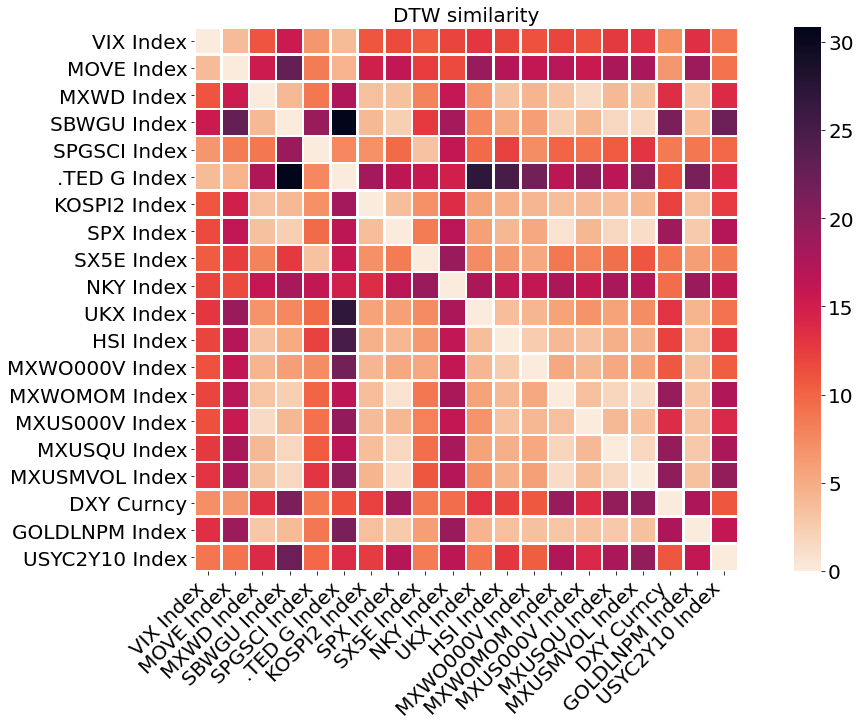

In [46]:
sim_arr_x = dtw_sim_matrix(df_mm)

In [47]:
df_z_corr = df_z.corr()

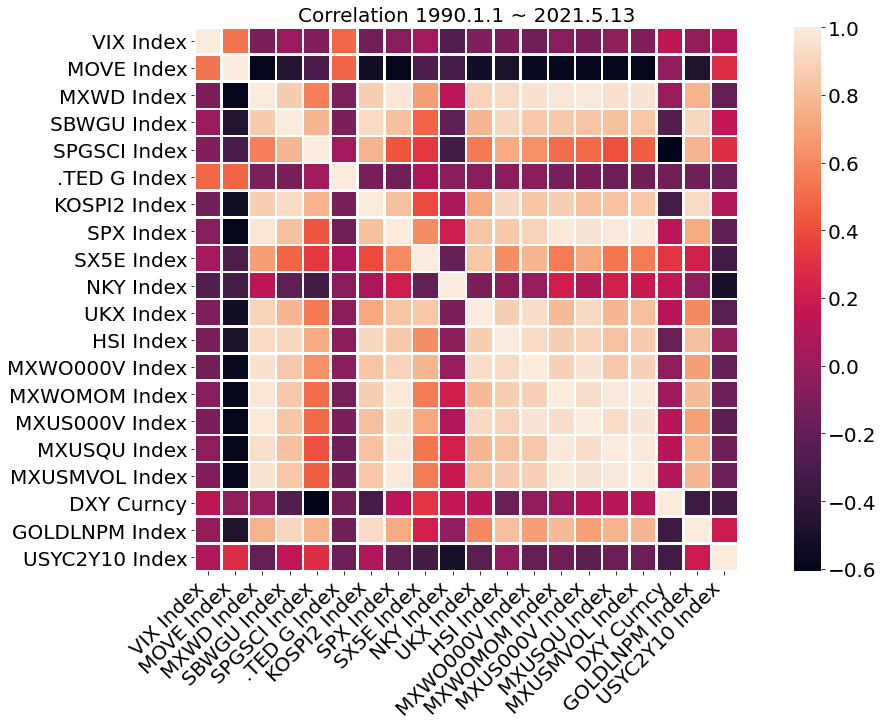

In [48]:
# map setting
plt.figure(figsize = (20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
# heatmap 
g = sns.heatmap(df_z_corr, square = True, linewidth= 1.5, cmap="rocket")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation 1990.1.1 ~ 2021.5.13", fontsize =(20))
plt.show()


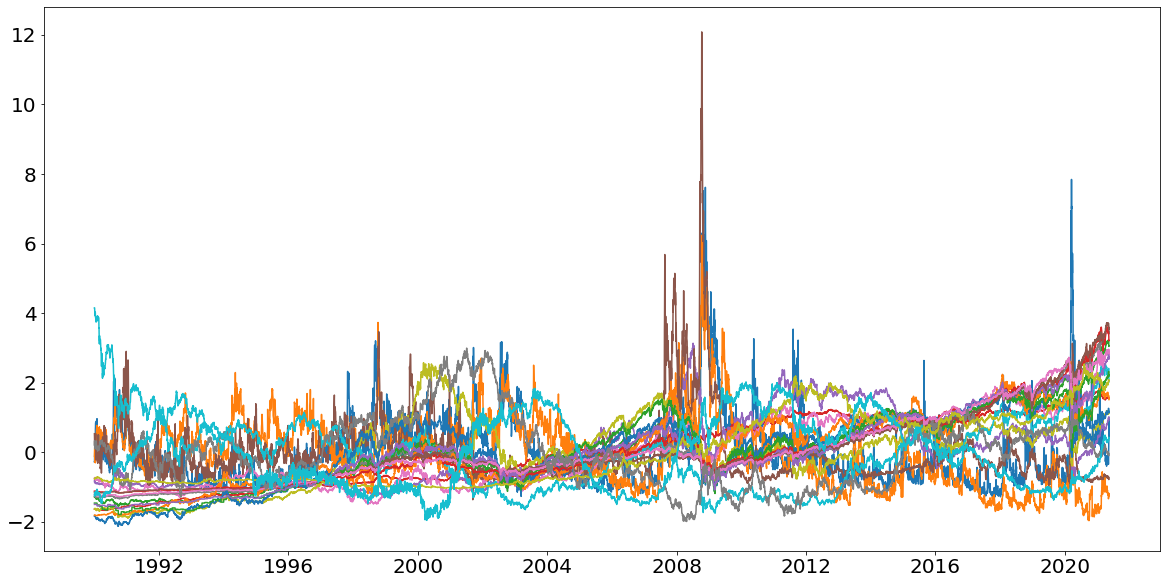

In [49]:
plt.figure(figsize = (20,10))
plt.plot(df_z)
plt.show()

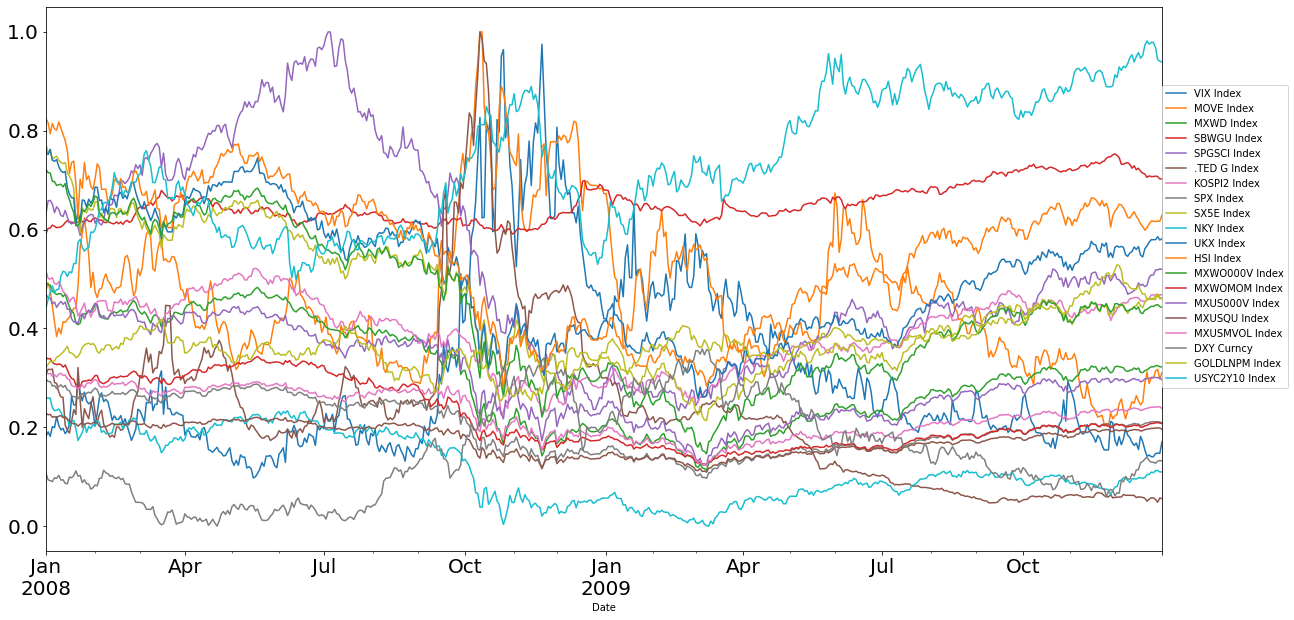

In [50]:
# plt.figure(figsize = (20,10))
(df_mm.loc['2008-01-01':'2009-12-31']).plot(figsize = (20,10))
plt.legend(loc=(1,0.3))
plt.show()

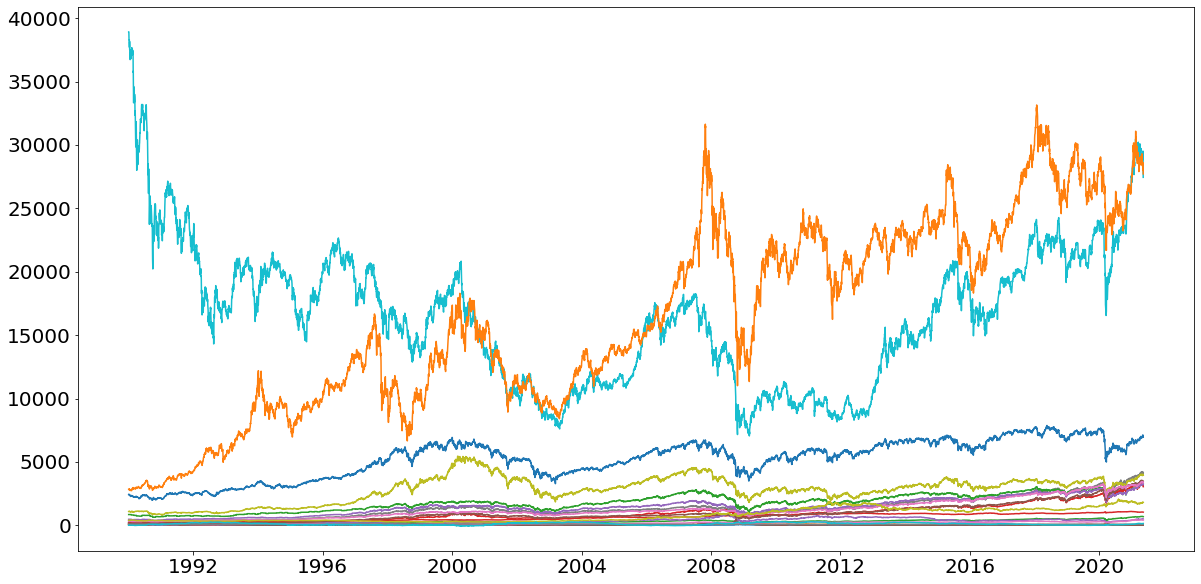

In [51]:
plt.figure(figsize = (20,10))
plt.plot(df)
# plt.legend(loc=(1,0.3))
plt.show()

# Target 과 X 간의 관계

In [52]:
def adj_generate(df_corr, min_threshold = 0.9, max_threshold = 1):
    '''
    input : df_corr(dataframe representing correlation)
    output : dataframe with 0, 1 (connectivity)
    '''
    df_adj = df_corr.applymap(lambda x : 1 if (abs(x)>min_threshold) & (abs(x)<max_threshold) else 0)
    return df_adj

In [53]:
import copy

In [54]:
df_tar.shape

(8184, 9)

In [55]:
dff = copy.deepcopy(df_tar) # target copied 

In [56]:
dff_col_name = list(dff.columns)
dff_index = list(dff.index)

In [57]:
dff_col_name_y = [name+'_Y' for name in dff_col_name]    

In [58]:
dfy = pd.DataFrame(dff.values, columns = dff_col_name_y, index = dff_index)

In [59]:
# 데이터 합치기 X, Y
dff = pd.concat([df,dfy], axis = 1)

In [60]:
dff.shape

(8184, 29)

In [61]:
# y 와 correlation 약한 것 확인

corr_df = pd.concat([df,dfy], axis = 1).corr()
# corr_df = pd.concat([df,dfy], axis = 1).corr()[dff_col_name_y]

In [62]:
adj_generate(corr_df, 0.2, 0.4)

,VIX Index,MOVE Index,MXWD Index,SBWGU Index,SPGSCI Index,.TED G Index,KOSPI2 Index,SPX Index,SX5E Index,NKY Index,...,USYC2Y10 Index,TLT_Y,EMB_Y,AGG_Y,Cash_Y,SPY_Y,EFA_Y,VWO_Y,GLD_Y,DBC_Y
VIX Index,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MOVE Index,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
MXWD Index,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SBWGU Index,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SPGSCI Index,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
.TED G Index,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KOSPI2 Index,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
SPX Index,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
SX5E Index,0,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
NKY Index,1,1,0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0


In [63]:
pd.concat([df,dfy], axis = 1).corr()['USYC2Y10 Index'].apply(lambda x : 1 if abs(x)>=0.3 else 0).sum()

4

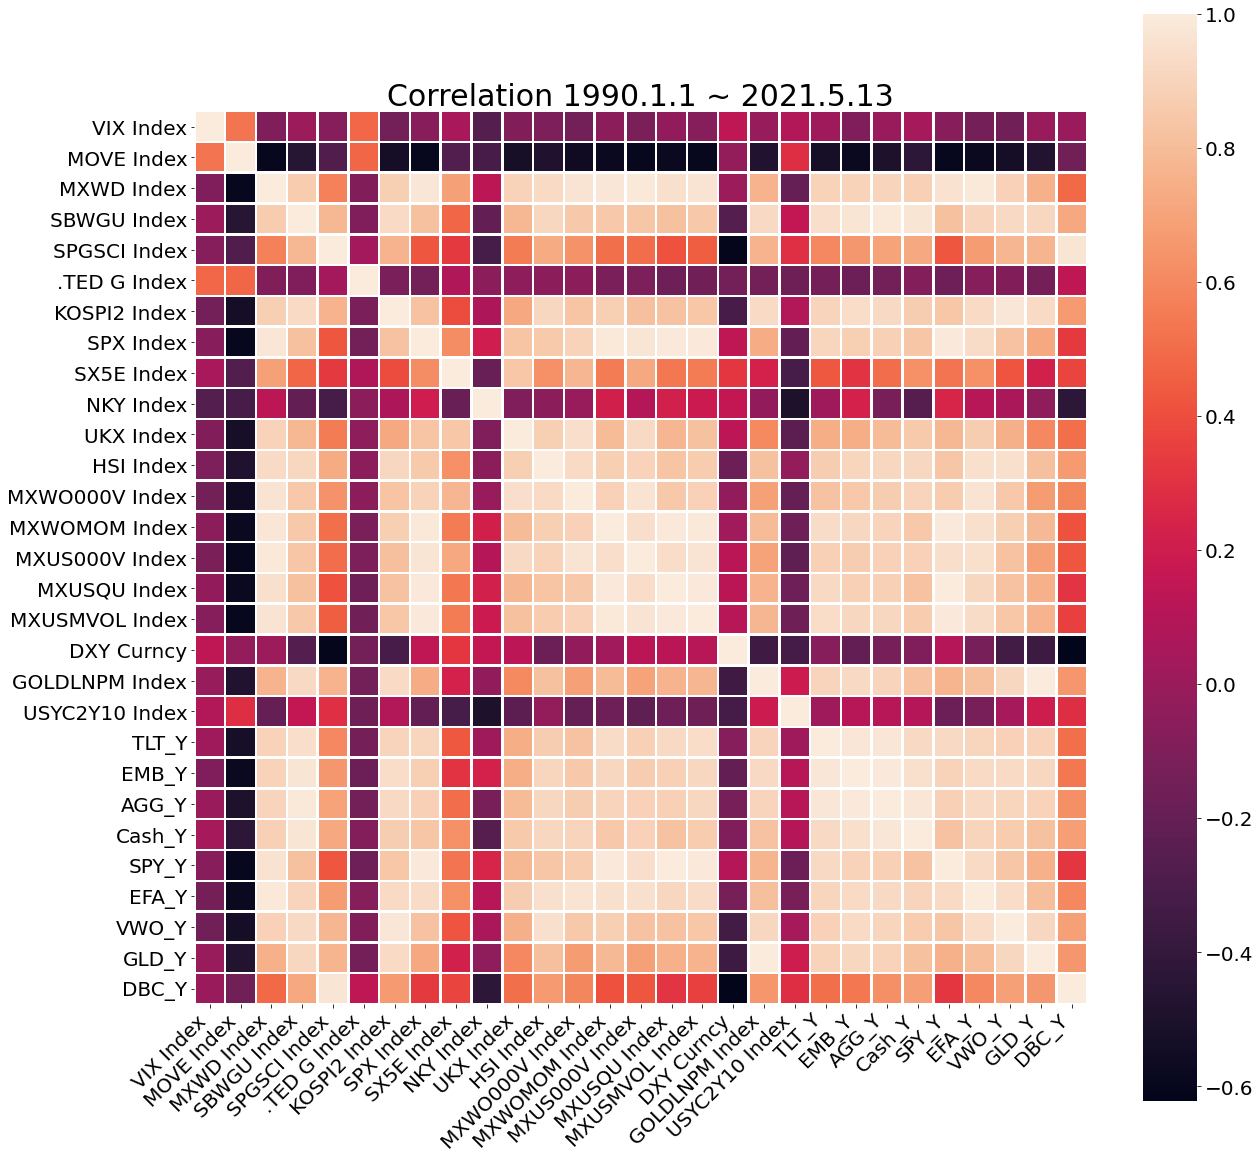

In [64]:

plt.figure(figsize = (20,20))
h = sns.heatmap(pd.concat([df,dfy], axis = 1).corr(), linewidth= 1.5,square = True)
# g = sns.heatmap(df_z_corr, square = True, linewidth= 1.5, cmap="rocket")
h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation 1990.1.1 ~ 2021.5.13', fontsize = 30)
plt.show()

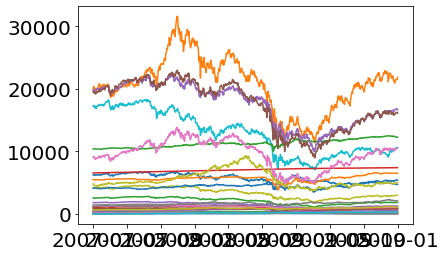

In [65]:
plt.plot(pd.concat([df,dfy], axis = 1).loc['2007-01-01':'2009-12-31'])
plt.show()

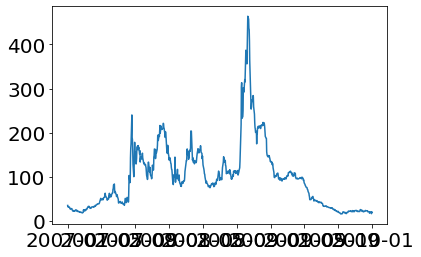

In [66]:
plt.plot(pd.concat([df,dfy], axis = 1)['.TED G Index'].loc['2007-01-01':'2009-12-31'])
plt.show()

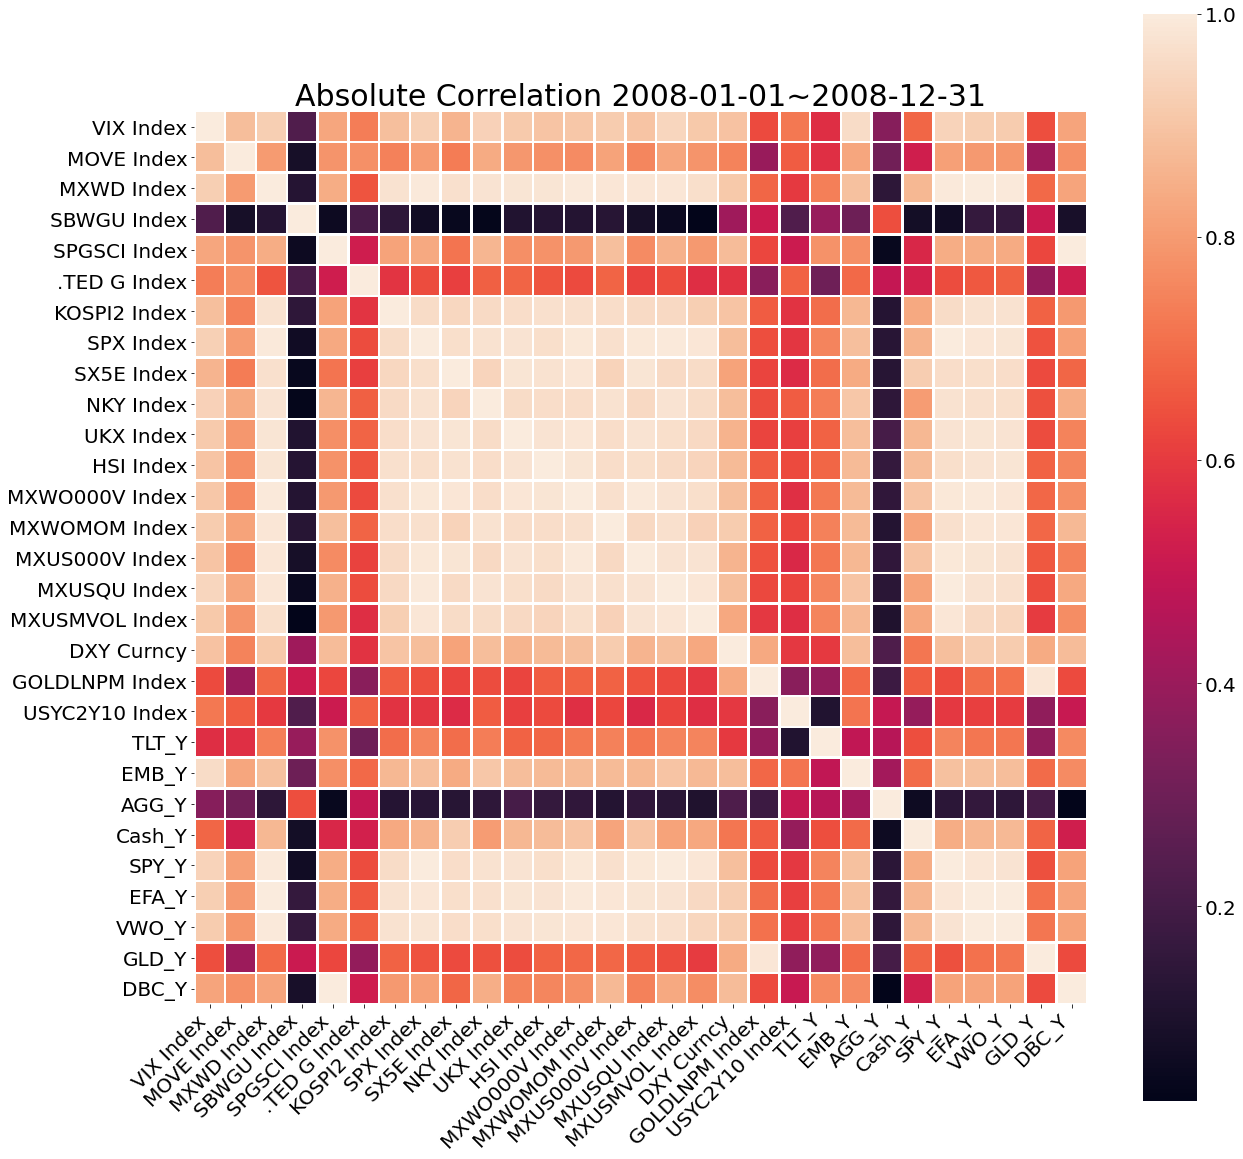

In [67]:

plt.figure(figsize = (20,20))
h = sns.heatmap(pd.concat([df,dfy], axis = 1).loc['2008-01-01':'2008-12-31'].corr().applymap(lambda x : abs(x)), linewidth= 1.5,square = True)
# g = sns.heatmap(df_z_corr, square = True, linewidth= 1.5, cmap="rocket")
h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize = (20))
plt.yticks(fontsize = (20))
plt.title('Absolute Correlation 2008-01-01~2008-12-31', fontsize = 30)
plt.show()

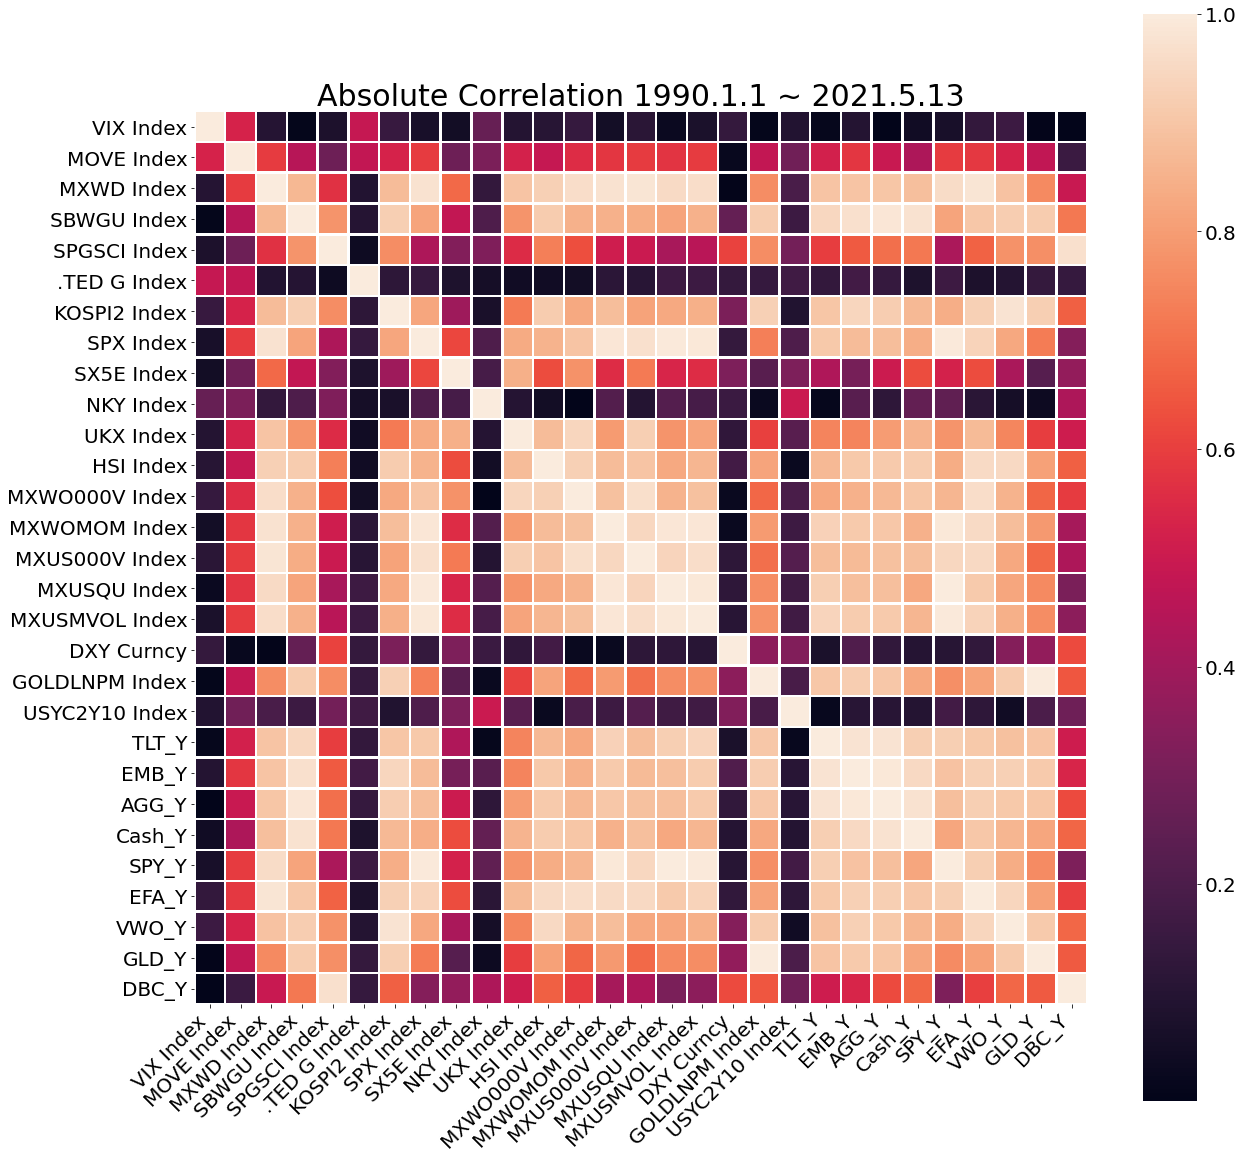

In [68]:

plt.figure(figsize = (20,20))
h = sns.heatmap(pd.concat([df,dfy], axis = 1).corr().applymap(lambda x : abs(x)), linewidth= 1.5,square = True)
# g = sns.heatmap(df_z_corr, square = True, linewidth= 1.5, cmap="rocket")
h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize = (20))
plt.yticks(fontsize = (20))
plt.title('Absolute Correlation 1990.1.1 ~ 2021.5.13', fontsize = 30)
plt.show()

## Drop columns 
- TED
- USYC2Y10

In [69]:
dff = dff.drop(columns = ['.TED G Index', 'USYC2Y10 Index'], axis = 1)

In [70]:
dff.shape

(8184, 27)

# Remaining NA Handling

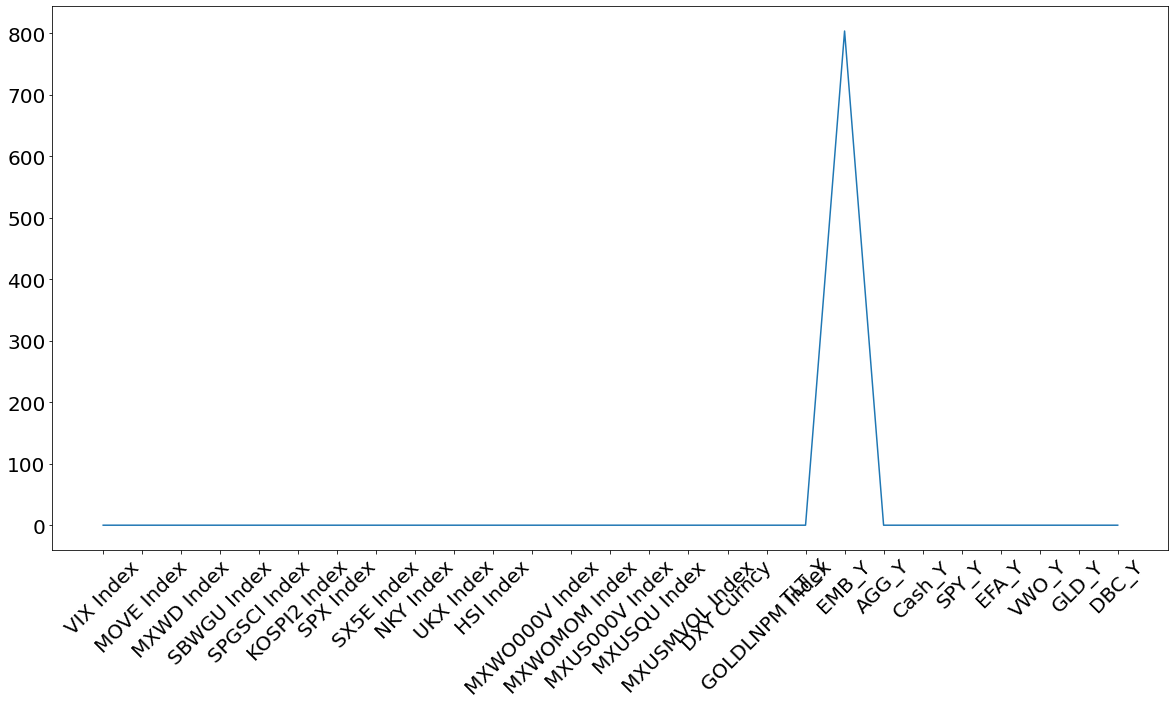

In [71]:
plt.figure(figsize = (20,10))
plt.plot(pd.DataFrame(dff.isna().sum(), columns=['Number of Nan']))
plt.xticks(rotation = 45)
plt.show()

In [72]:
emb = dff[['EMB_Y']].dropna(axis = 0)
emb.index.name = 'Date'

In [73]:
# 뒤집어서 구한다. 
x = np.arange(emb.index.size)
# emb_rev = emb.values[::-1]
emb_rev = emb.values

In [74]:
emb_rev

array([[ 1000.     ],
       [ 1000.     ],
       [ 1000.     ],
       ...,
       [12350.99587],
       [12238.70061],
       [12302.07261]])

In [75]:
fit = np.polyfit(x, emb_rev, deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : [1.60407652]
Intercept : [-225.30551816]


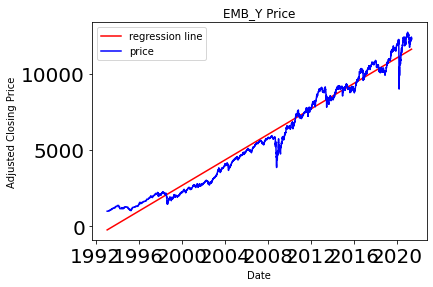

In [76]:
#Fit function : y = mx + c [linear regression ]

# https://ishan-mehta17.medium.com/simple-linear-regression-fit-and-prediction-on-time-series-data-with-visualization-in-python-41a77baf104c
fit_function = np.poly1d(np.squeeze(fit))

#Linear regression plot
plt.plot(emb.index, fit_function(x), color = 'red', label = 'regression line')
#Time series data plot
plt.plot(emb.index, emb, color = 'b',label = 'price')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('EMB_Y Price')
plt.show()

In [77]:
dff['EMB_Y'].isna().sum()

804

In [78]:
emb_std = emb.ewm(span = 30).std().interpolate() # 30일 편차

emb_std_ls = list(np.squeeze(emb_std.values))


em_ls = [x for y in list(emb_rev) for x in y]

# linear line 에 대해서 예측 + std random 

prediction = [round(fit_function(emb.index.size + i) + (emb_std_ls[-i])) for i in range(1,805)] # prediction + random std(30)
prediction = [x if x > 0 else 0 for x in prediction] # negative value to zero




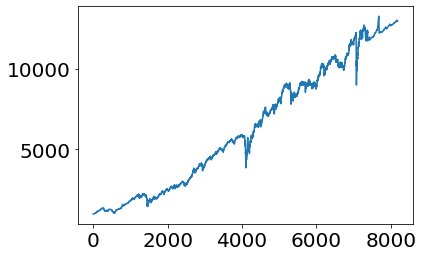

In [79]:
emb_exp = em_ls + prediction 

plt.plot(emb_exp)

In [80]:
np.mean(range(0, 2))

0.5

In [81]:
list(range(0, 2))

[0, 1]

In [82]:
# split last value to 0 value

### std noise 추가 
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

split_last = list(split(range(int(em_ls[-1])),804))
split_mean = [np.mean(x) for x in split_last]

In [83]:
len(emb_std_ls)

7380

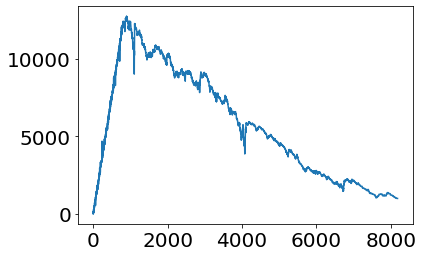

In [84]:
prediction = [(em_ls[-1]-x + (round(emb_std_ls[np.random.randint(1,len(emb_std_ls))]))*([-1,1][np.random.randint(0,2)])) for x in split_mean]
prediction = list(np.where(np.array(prediction)<0, 100, np.array(prediction)))
emb_exp = em_ls + prediction 
emb_exp2 = emb_exp[::-1]
plt.plot(emb_exp2)

In [85]:
# plt.plot(np.where(df.index<=1, df["myvalue"], None), color="red", label="1")
# plt.plot(np.where(df["label"]==0, df["myvalue"], None), color="blue", label="0")
# plt.legend()

In [86]:
EMB_Y_exp = pd.DataFrame(np.array(emb_exp2), columns = emb.columns, index = dff.index)

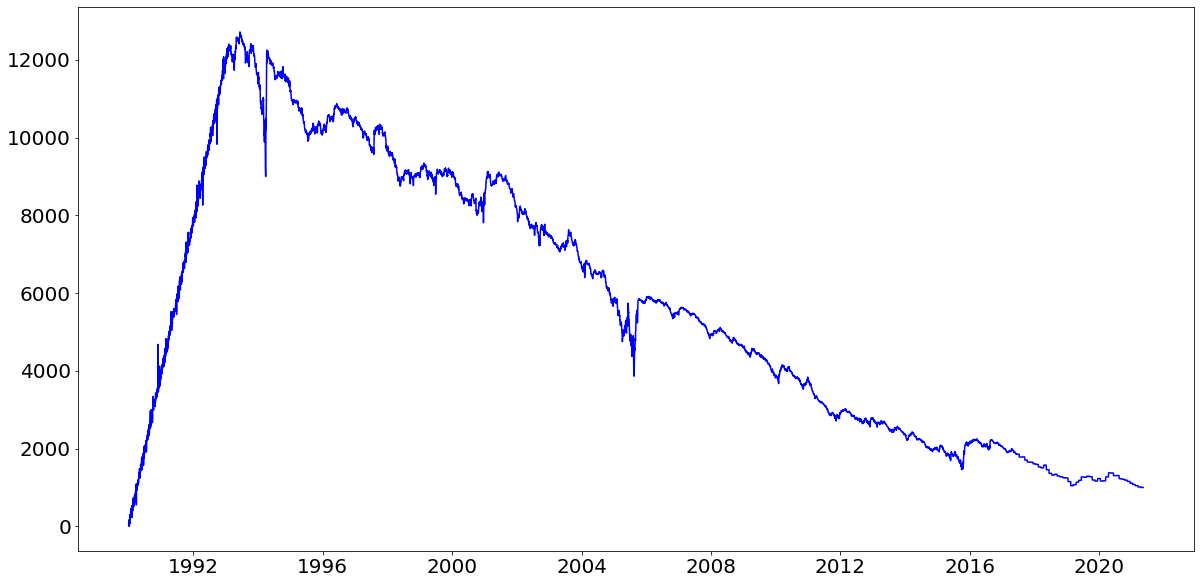

In [87]:
plt.figure(figsize = (20,10))
plt.plot(EMB_Y_exp, color = 'blue')
plt.xticks(fontsize = (20))
plt.yticks(fontsize = (20))
plt.show()

## EMB_Y 새로 만든거 추가 

In [88]:
asdf = dff.drop('EMB_Y', axis = 1)

In [89]:
dff = asdf.join(EMB_Y_exp)

In [90]:
dff.shape

(8184, 27)

In [91]:
dff.shape

(8184, 27)

In [92]:
dff.to_csv("./data/df_XY.csv")

# Feature Generation  
Individual Asset   
concated version 
- rolling volatility
- rolling return 
- rolling correlation 
- XY correlation 

In [93]:
def return_volatility(df_bench):
    '''
    return & volatility
    '''  
    logret = np.log(df_bench/df_bench.shift(1)).dropna()
    T = logret.shape[0]

    sigma = logret.cov() * T # annualize sigma (check again)
    mu = logret.mean()*T

    return mu, sigma

In [94]:
dff.shape

(8184, 27)

In [95]:
mu, sigma = return_volatility(dff)

Text(0.5, 1.0, 'Volatility 1990.1.1 ~ 2021.5.13')

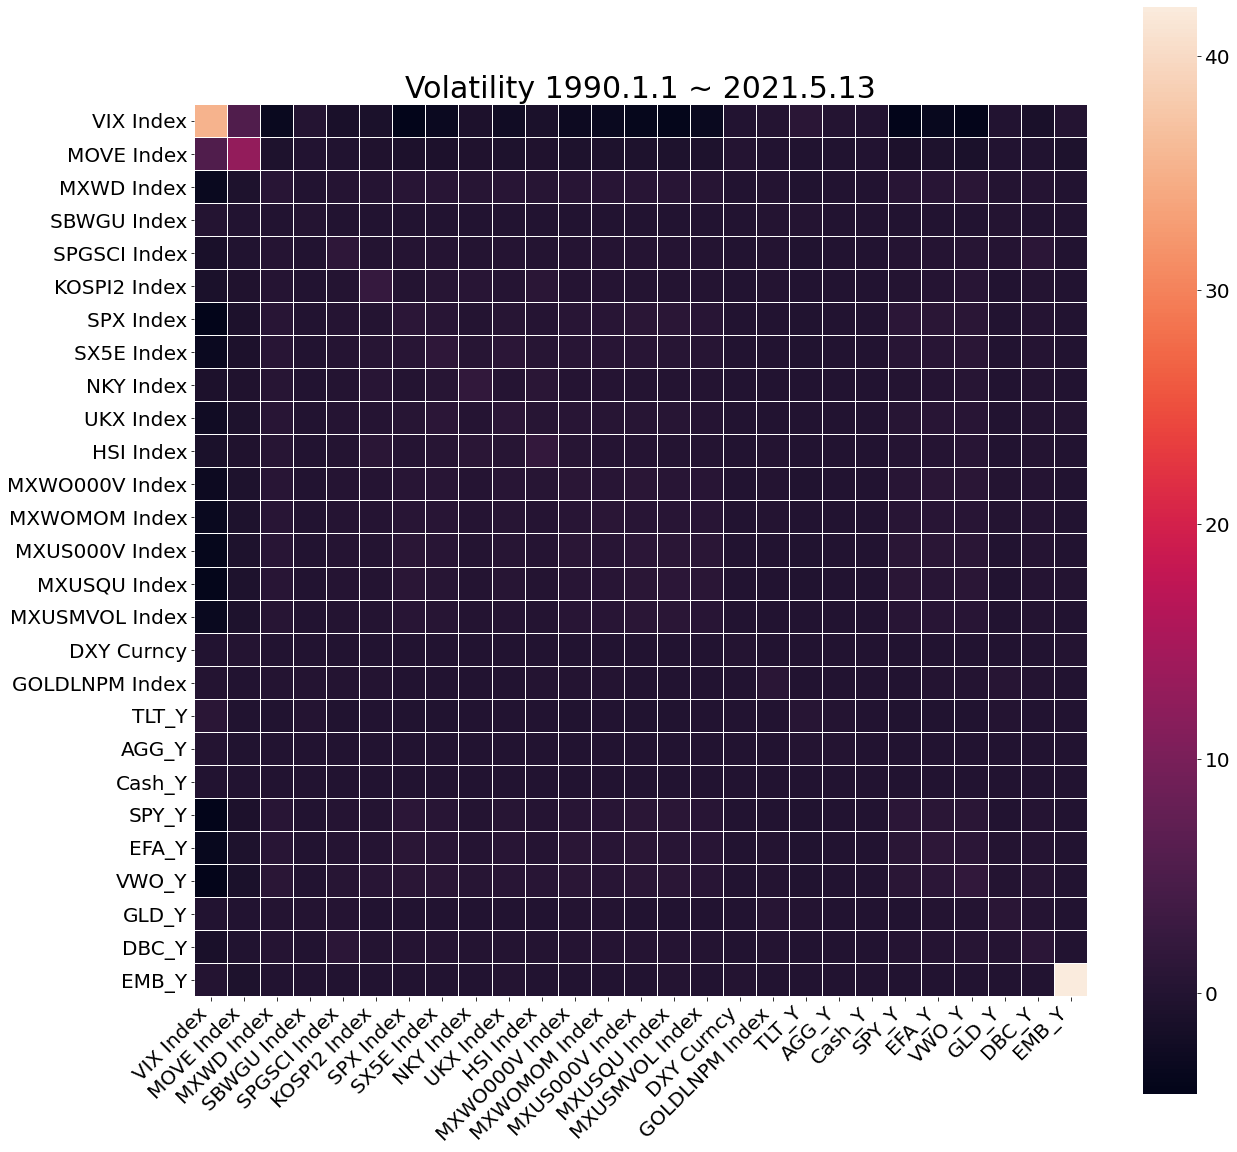

In [96]:
plt.figure(figsize = (20,20))
h= sns.heatmap(sigma, linewidth = 0.01, square = True)
h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(fontsize = (20))
plt.yticks(fontsize = (20))
plt.title("Volatility 1990.1.1 ~ 2021.5.13", fontsize = 30)

In [97]:
dff.columns

Index(['VIX Index', 'MOVE Index', 'MXWD Index', 'SBWGU Index', 'SPGSCI Index',
       'KOSPI2 Index', 'SPX Index', 'SX5E Index', 'NKY Index', 'UKX Index',
       'HSI Index', 'MXWO000V Index', 'MXWOMOM Index', 'MXUS000V Index',
       'MXUSQU Index', 'MXUSMVOL Index', 'DXY Curncy', 'GOLDLNPM Index',
       'TLT_Y', 'AGG_Y', 'Cash_Y', 'SPY_Y', 'EFA_Y', 'VWO_Y', 'GLD_Y', 'DBC_Y',
       'EMB_Y'],
      dtype='object')

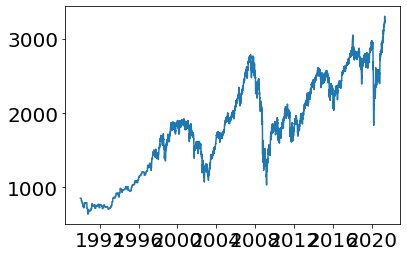

In [98]:
plt.plot(dff['MXWO000V Index'])

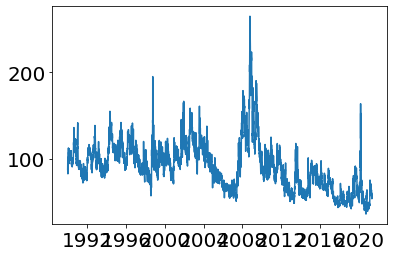

In [99]:
plt.plot(dff['MOVE Index'])

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

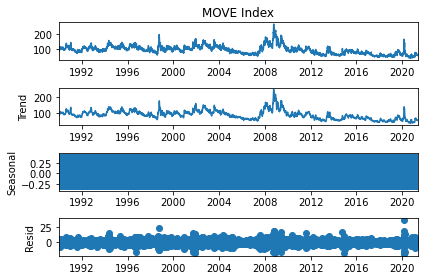

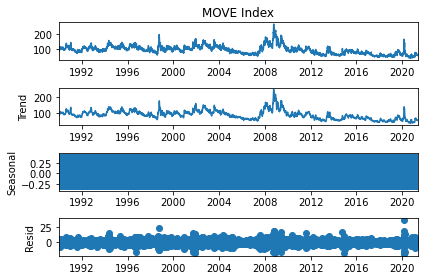

In [101]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

result = seasonal_decompose(dff['MOVE Index'], model = 'additive')
result.plot()

Text(0.5, 1.0, 'USYC2Y10 Index')

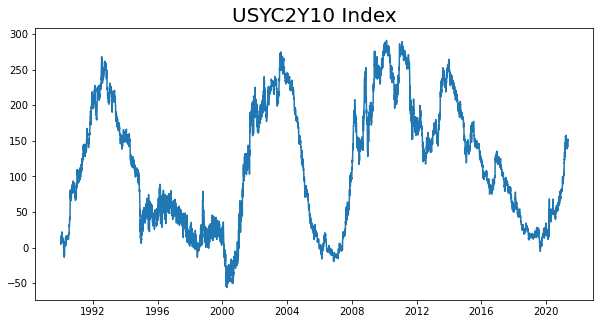

In [102]:
plt.figure(figsize = (10,5))
plt.plot(df['USYC2Y10 Index'])
plt.title("USYC2Y10 Index", fontsize = 20)


Text(0.5, 1.0, 'MOVE Index')

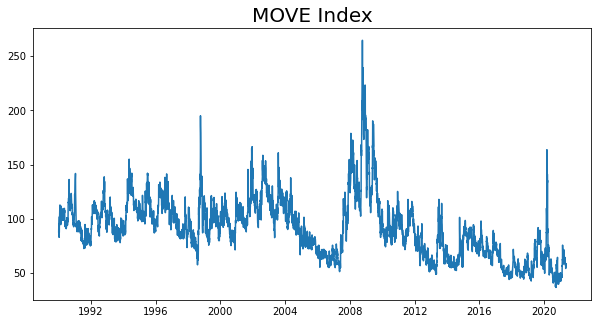

In [103]:
plt.figure(figsize = (10,5))
asset = 'MOVE Index'
plt.plot(df[asset])
plt.title("{}".format(asset), fontsize = 20)


Text(0.5, 1.0, '.TED G Index')

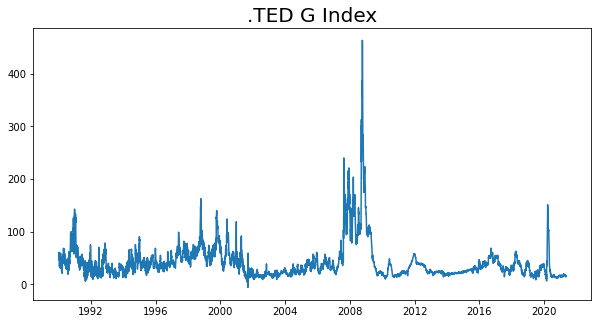

In [104]:
plt.figure(figsize = (10,5))
plt.plot(df['.TED G Index'])
plt.title(".TED G Index", fontsize = 20)


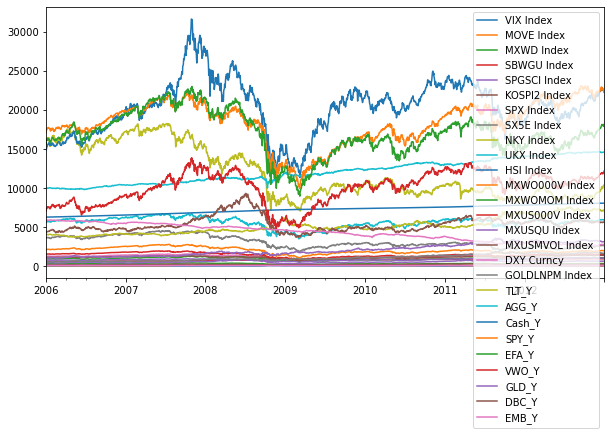

In [105]:
# 특이한 시점 확인
(dff.loc['2006-01-01':'2012-12-31']).plot(figsize = (10,5))
plt.show()

In [106]:
dff_cor_2008 = dff.loc['2008-01-01':'2009-12-31'].corr()

test_corr = {}

corr_mx = adj_generate(dff_cor_2008, min_threshold = 0.5)

for name in dff_cor_2008.columns:
    count = corr_mx[name].sum()
    test_corr[name] = count

Text(0.5, 1.0, 'SBWGU Index')

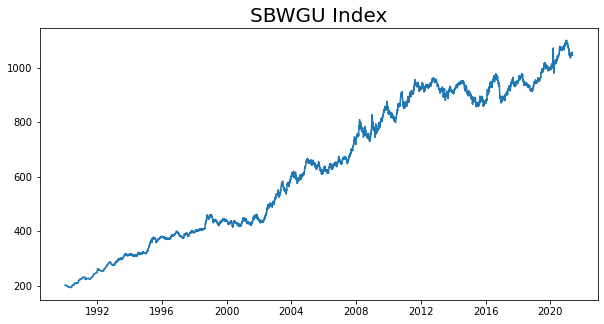

In [107]:
plt.figure(figsize = (10,5))
asset = 'SBWGU Index'
plt.plot(df[asset])
plt.title("{}".format(asset), fontsize = 20)


In [108]:
dff.shape

(8184, 27)

In [109]:
# 1,2 짜리 fill

In [110]:
plt.plot(df['MXUSMMT Index'].dropna(axis = 0))

KeyError: 'MXUSMMT Index'

In [ ]:
df['MXUSMMT Index']['1994-05-31':].isna().sum(0)

In [ ]:
# https://pandas.pydata.org/pandas-docs/version/0.14.0/visualization.html

    
plt.figure(figsize = (20,10))
plt.plot(df)
# plt.plot(df_s_mean)
# plt.plot(df_l_mean)

for i in range(df_l_mean.shape[1]):
    plt.fill_between(df.index, df_l_mean.iloc[:,i]-2*df_l_std.iloc[:,i], df_l_mean.iloc[:,i]+2*df_l_std.iloc[:,i], color = 'b', alpha = 0.3)

plt.show()